In [ ]:
import numpy as np
from suncasa import eovsa

from astropy.io import fits
import numpy as np
from glob import glob
# colors from colormap
import matplotlib
# rotate back to j2000

from eovsa_synop import rotation_corr_util

%load_ext autoreload
%autoreload 2

In [3]:
from suncasa.eovsa.eovsa_synoptic_imaging_pipeline import solar_diff_rot_image, trange2timerange
from sunpy import map as smap
import matplotlib.pyplot as plt
from astropy.time import Time
from eovsa_synop import rotation_corr_util
from eovsa_synop import wrap_wsclean

/opt/homebrew/anaconda3/envs/lwa/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Imported CASA tasks from casatasks: split, tclean, casalog, clearcal, gaincal.
Imported CASA tasks from casatasks: gaincal, applycal, clearcal, delmod, ft, uvsub, split, concat, flagmanager, flagdata, tclean, hanningsmooth, imhead.


In [4]:
from suncasa.utils import helioimage2fits as hf

In [5]:
vis_fname = "./UDB20241215.ms"
fits_fname = './eovsa-image.fits'

In [6]:
fulldaymap =  smap.Map(fits_fname)

ValueError: Did not find any files at eovsa-image.fits

In [7]:
t_begin, t_end = rotation_corr_util.get_begin_end_time_from_ms(vis_fname)
timerange = trange2timerange([t_begin, t_end])
print(timerange)

2024/12/15/16:06:54~2024/12/15/23:30:55


In [ ]:
heliofits = "heliofits.fits"
hf.imreg(vis=vis_fname, imagefile=fits_fname, fitsfile=heliofits,
          timerange=timerange, overwrite=True)

['heliofits.fits']

In [43]:
esun_map = smap.Map('heliofits.fits')

In [44]:
new_t = "2024-12-17T16:06:54"
newtime = Time(new_t, format='isot', scale='utc')

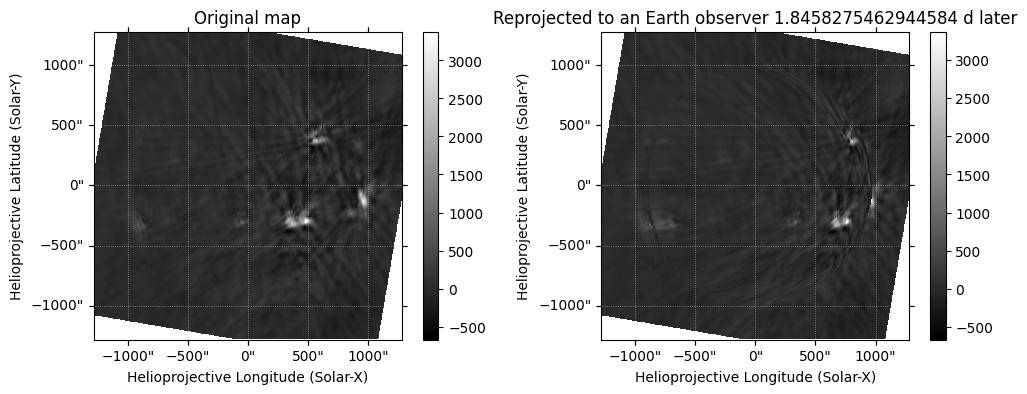

'out_rotated.fits'

In [45]:
rotation_corr_util.solar_diff_rot_heliofits(heliofits, newtime, out_fits='out_rotated.fits', showplt=True)

In [68]:
fname_fits

['eovsa-t0000-image.fits',
 'eovsa-t0001-image.fits',
 'eovsa-t0002-image.fits',
 'eovsa-t0003-image.fits',
 'eovsa-t0004-image.fits',
 'eovsa-t0005-image.fits']

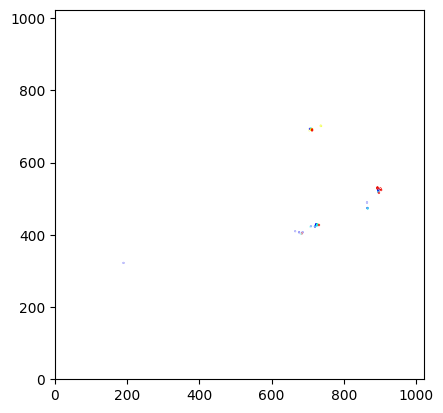

In [107]:
fname_fits  = sorted(glob('runtime/eovsa-t*model.fits'))


# colorlist from colormap
cmap = plt.cm.get_cmap('jet')
colors = cmap(np.linspace(0.1, 0.9, len(fname_fits)))

for fname in fname_fits:
    with fits.open(fname) as hdul:
        data = hdul[0].data
        plt.contour(data[0,0,:,:], levels=[0.5*np.nanmax(data)], colors=[colors[fname_fits.index(fname)]], linewidths=1.5)


# equal_aspect ratio
plt.gca().set_aspect('equal', adjustable='box')
#plt.xlim(600,1000)
#plt.ylim(350,750)

In [48]:
new_t = "2024-12-15T20:00:00"
newtime = Time(new_t, format='isot', scale='utc')


t_begin, t_end = rotation_corr_util.get_begin_end_time_from_ms(vis_fname)

# split the time range into 10 equal parts

t_range_set = np.linspace(t_begin, t_end, 11)


fname_fits = sorted(glob('eovsa*t00*model.fits'))

for idx,fname in enumerate(fname_fits):

    timerange = trange2timerange([t_range_set[idx], t_range_set[idx+1]])

    fnamehelio = fname.replace(".fits",".heliofit.fits")

    hf.imreg(vis=vis_fname, imagefile=fname, fitsfile=fnamehelio, timerange=timerange, overwrite=True)
    rotation_corr_util.solar_diff_rot_heliofits(fnamehelio, newtime, 
        out_fits=fnamehelio.replace(".fits",".rotated.fits"), showplt=False)


Warning!!! Only one record exists in the ms ephemeris record.
           I have to use this only record to register the image.
Warning!!! Only one record exists in the ms ephemeris record.
           I have to use this only record to register the image.
Warning!!! The provided reference time falls AFTER the last ephemeris record.
            I have to use the last record to register the image


(350.0, 750.0)

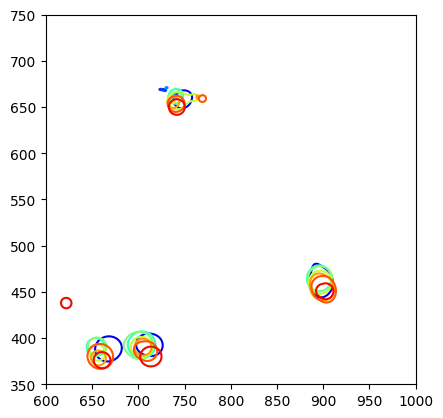

In [50]:
fname_fits  = sorted(glob('eovsa*-model.heliofit.rotated.fits'))


# colorlist from colormap

cmap = plt.cm.get_cmap('jet')
colors = cmap(np.linspace(0.1, 0.9, len(fname_fits)))

for fname in fname_fits:
    with fits.open(fname) as hdul:
        data = hdul[0].data
        plt.contour(data.squeeze(), levels=[0.4*np.nanmax(data)], colors=[colors[fname_fits.index(fname)]], linewidths=1.5)


# equal_aspect ratio

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(600,1000)
plt.ylim(350,750)

In [ ]:


rotation_corr_util.sunpyfits_to_j2000fits("./eovsa-t0001-model.heliofit.rotated.fits", 
                                          "./eovsa-t0001-model.heliofit.rotate_back.fits",
                                          "./eovsa-t0001-model.fits")

'./eovsa-t0001-model.heliofit.rotate_back.fits'

In [ ]:
sunfits_files = sorted(glob('eovsa*t00*-model.heliofit.rotated.fits'))

for sunfits_file in sunfits_files:
    rotation_corr_util.sunpyfits_to_j2000fits(sunfits_file, 
                                              sunfits_file.replace("heliofit.rotated", "heliofit.rotate_back"),
                                              sunfits_file.replace("heliofit.rotated.fits", "fits"))

(350.0, 750.0)

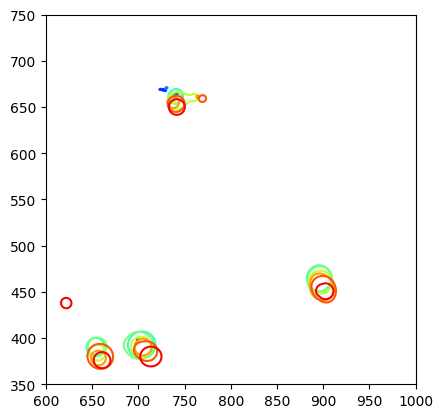

In [55]:
sunfits_files = sorted(glob('eovsa*t00*-model.heliofit.rotated.fits'))


# colorlist from colormap

cmap = plt.cm.get_cmap('jet')
colors = cmap(np.linspace(0.1, 0.9, len(fname_fits)))

for fname in sunfits_files:
    with fits.open(fname) as hdul:
        data = hdul[0].data
        plt.contour(data.squeeze(), levels=[0.4*np.nanmax(data)], colors=[colors[fname_fits.index(fname)]], linewidths=1.5)


# equal_aspect ratio

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(600,1000)
plt.ylim(350,750)

In [154]:


fits1 = "eovsa0-image.fits"
fits2 = "eovsa1-image.fits"


hdu1 = fits.open(fits1)
hdu2 = fits.open(fits2)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(hdu1[0].data.squeeze(), origin='lower', cmap='jet')
plt.title('Image 1')
plt.colorbar()
plt.subplot(122)
plt.imshow(hdu2[0].data.squeeze(), origin='lower', cmap='jet')
plt.title('Image 2')
plt.colorbar()


FileNotFoundError: [Errno 2] No such file or directory: 'eovsa0-image.fits'

In [124]:
np.nanmax(hdu1[0].data) / np.nanmin(hdu1[0].data)

np.float32(-4.249137)

In [122]:
np.nanmax(hdu2[0].data) / np.nanmin(hdu2[0].data)

np.float32(-7.1037717)

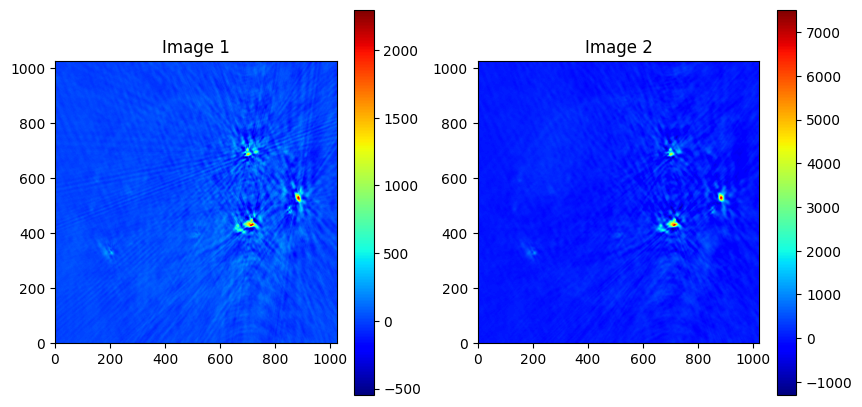

In [151]:


fits1 = "eovsa00-image.fits"
fits2 = "eovsa11-image.fits"


hdu1 = fits.open(fits1)
hdu2 = fits.open(fits2)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(hdu1[0].data.squeeze(), origin='lower', cmap='jet')#, vmin=0, vmax=np.nanmax(0.5*hdu1[0].data.squeeze()))

plt.title('Image 1')
plt.colorbar()
plt.subplot(122)
plt.imshow(hdu2[0].data.squeeze(), origin='lower', cmap='jet')#, vmin=0, vmax=np.nanmax(0.5*hdu2[0].data.squeeze()))
plt.title('Image 2')
plt.colorbar()


In [152]:
np.nanmax(hdu1[0].data) / np.nanmin(hdu1[0].data)

np.float32(-4.2184463)

In [153]:
np.nanmax(hdu2[0].data) / np.nanmin(hdu2[0].data)

np.float32(-5.83088)

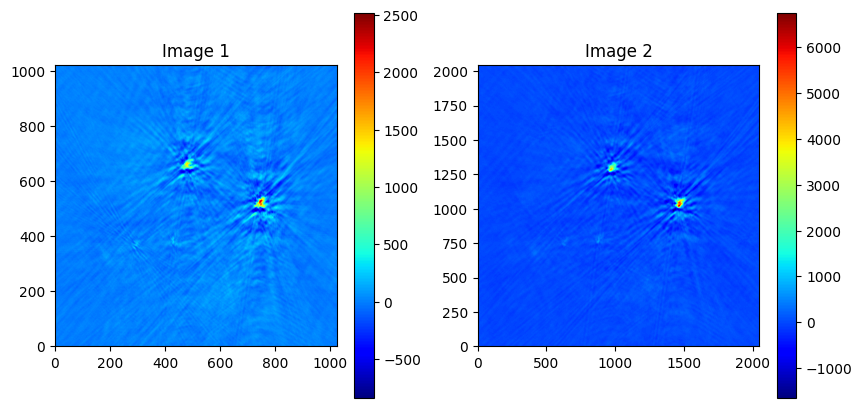

In [16]:


fits1 = "eovsa000-image.fits"
fits2 = "eovsa111-image.fits"


hdu1 = fits.open(fits1)
hdu2 = fits.open(fits2)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(hdu1[0].data.squeeze(), origin='lower', cmap='jet')#, vmin=0, vmax=np.nanmax(0.5*hdu1[0].data.squeeze()))

plt.title('Image 1')
plt.colorbar()
plt.subplot(122)
plt.imshow(hdu2[0].data.squeeze(), origin='lower', cmap='jet')#, vmin=0, vmax=np.nanmax(0.5*hdu2[0].data.squeeze()))
plt.title('Image 2')
plt.colorbar()


In [17]:
print(np.nanmax(hdu1[0].data) / np.nanmin(hdu1[0].data))
print(np.nanmax(hdu2[0].data) / np.nanmin(hdu2[0].data))

-3.0004501
-4.0715504
